# PyROOT notes

PyROOT notebook
 - binomial errors

### Binomial

In [1]:
import ROOT
from IPython.display import display, Math, Latex
import rootnotes

Welcome to JupyROOT 6.10/05


In [2]:
h1 = ROOT.TH1F("h1","h1",11,0,11)
h2 = ROOT.TH1F("h2","binomial counts",11,0,11)
h3 = ROOT.TH1F("h3","h3",11,0,11)
h4 = ROOT.TH1F("h4","binomial distribution",11,0,11)
for i in range(11): h1.SetBinContent(i+1,10)
for i in range(11): h2.SetBinContent(i+1,i)


In [23]:
c1 = ROOT.TCanvas("c1","c1",800,700)
ROOT.gStyle.SetOptStat(0)
h1.SetLineColor(4)
h1.SetLineWidth(2)
h1.SetFillColor(4)
h1.SetFillStyle(3003)
h2.SetLineColor(2)
h2.SetFillColor(2)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
h1.Sumw2();h2.Sumw2()
h2.Draw("hist");h1.Draw("hist same");h2.Draw("hist same");

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


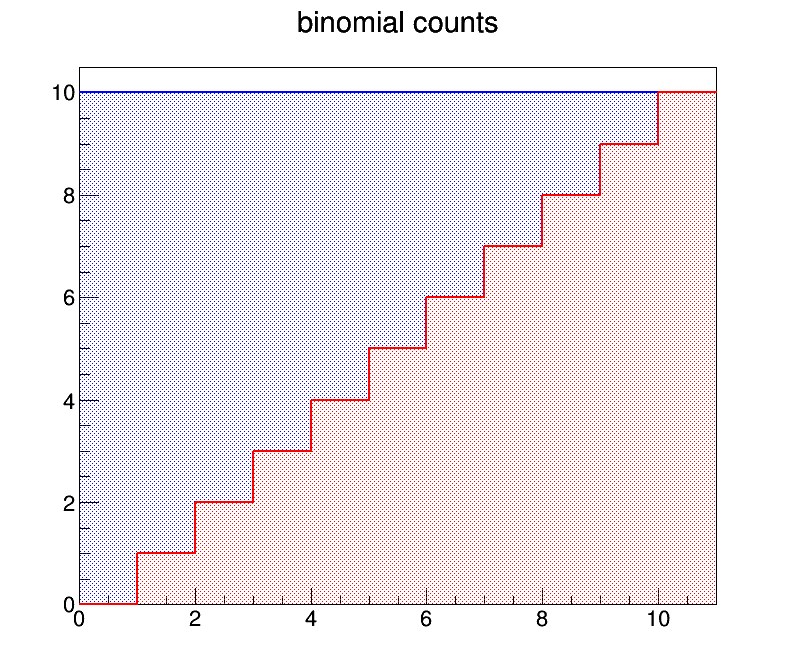

Info in <TCanvas::Print>: png file /tmp/tmpIWompq.png has been created


In [24]:
c1

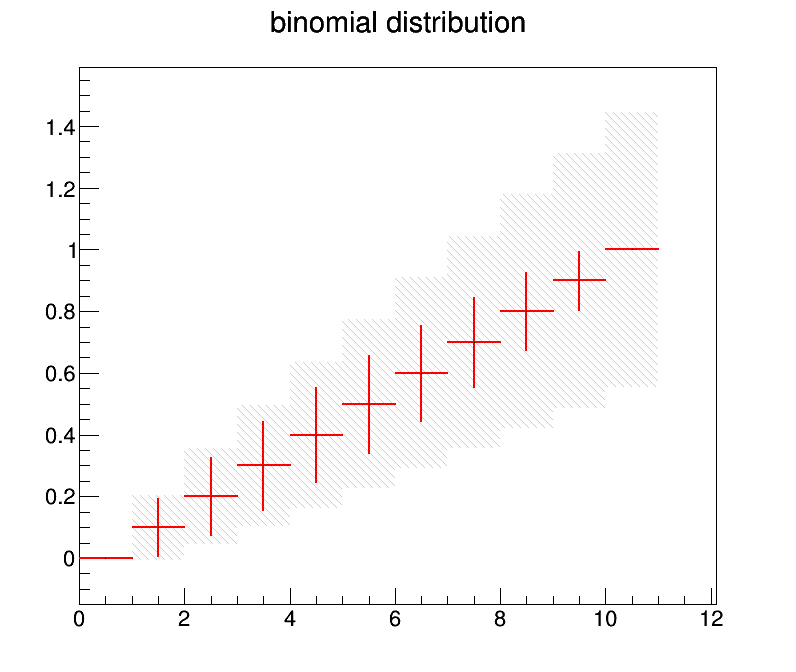

Info in <TCanvas::Print>: png file /tmp/tmpmdmhLv.png has been created


In [25]:
h3.Divide(h2,h1,1,1,"b")
h4.Divide(h2,h1)
h3.SetLineColor(2)
h3.SetLineWidth(2)
h4.SetLineColor(29)
h4.SetLineWidth(5)
tge1 = ROOT.TGraphErrors(h4)
tge1.SetFillColor(17)
tge1.SetFillStyle(3005)
tge1.Draw("AP2")
#h4.Draw("e0")
h3.Draw("e0 same")
c1

In [26]:
tgae = ROOT.TGraphAsymmErrors()

In [27]:
tgae.Divide(h2,h1,"cl=0.683 b(1,1) mode")

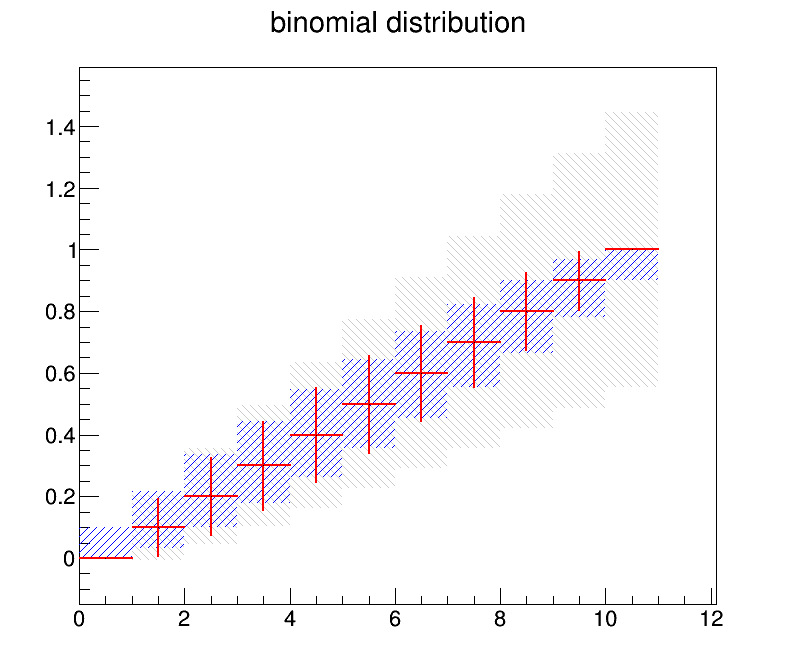

Info in <TCanvas::Print>: png file /tmp/tmpm38j2b.png has been created


In [28]:
tgae.SetFillColor(4)
tgae.SetFillStyle(3004)
tgae.Draw("P2")
h3.Draw("e0 same")
c1

**GREY SHADE**: poisson error on A/B

**RED LINE**: Binomial error calculation option in **TH1**: 

 ## $ \delta w^{2} = \frac{1}{N^{2}} \left[\left(\frac{A}{N}\right)^{2} \delta N^{2} +\left(1-2\frac{A}{N}\right)\delta A^{2}\right]$


**BLUE SHADE** : Bayesian interval estimates implemented in **TGraphAsymmErros::Divide** . Mainly used for error estimates in 0 counts in poisson processes
https://root.cern.ch/doc/master/classTGraphAsymmErrors.html#a37a202762b286cf4c7f5d34046be8c0b